# Unir los csv de delitos para identificar todos los delitos a clasificar

En este primer paso lo primero que hago es unir todos los archivos de las carpetas de investigación que tengo a través de los años. Asimismo guardo el nuevo archivo con el nombre de ***crimen_2019_2024***. 
Nota: No lo guardo como *carpetas_2019_2024* porque si vuelvo a correr el código, como una de las condiciones para juntar los archivos era tomar todos los que empiezan con *carpetas*, entonces voy a copiar dos veces la base. 

In [88]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [89]:
# Ruta de la carpeta con los archivos
carpeta = r"C:\Users\santo\Documents\CIDE\Tesis\datos_crimen"

In [90]:
# Lista todos los archivos en la carpeta que empiecen con 'listings'
archivos = sorted([f for f in os.listdir(carpeta) if f.startswith("carpetas") and f.endswith(".csv")])

# Lista vacía para ir guardando los DataFrames
dataframes = []

# Leer y guardar todos los archivos
for archivo in archivos:
    ruta_completa = os.path.join(carpeta, archivo)
    df = pd.read_csv(ruta_completa, dtype={10: str})
    dataframes.append(df)

# Concatenar todos los DataFrames
df_concatenado = pd.concat(dataframes, ignore_index=True)

#Modificar la columna de "fecha_hecho" para que esté en el formato correcto.
#La idea/pensamiento actual es que esa columna/variable indica el momento en el que ocurrió el delito, mientras que la de "fecha_inicio" es cuando se abrió la carpeta
df_concatenado['fecha_hecho'] = pd.to_datetime(df_concatenado['fecha_hecho'])
df_concatenado['fecha_hecho'] = df_concatenado['fecha_hecho'].dt.to_period('M').dt.to_timestamp()

#Filtrar el periodo de tiempo necesario
df_concatenado_filtrado = df_concatenado.loc[(df_concatenado['fecha_hecho'] >= '2019-01-01') & (df_concatenado['fecha_hecho'] <= '2020-12-31')].copy()
# Guardar el resultado en un nuevo archivo
df_concatenado_filtrado.to_csv(os.path.join(carpeta, "crimen_2019_2020.csv"), index=False)


In [91]:
df_concatenado_filtrado

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,fiscalia,agencia,unidad_investigacion,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
681595,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,01:05:00,DAÑO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-3SD,AGRÍCOLA PANTITLAN,Agricola Pantitlan,IZTACALCO,Iztacalco,CDMX,19.404300,-99.068570
681597,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,02:15:00,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,DELITO DE BAJO IMPACTO,...,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-3,UI-3CD,GARCIMARRERO,Garcimarrero,ALVARO OBREGON,Álvaro Obregón,CDMX,19.367490,-99.237140
681598,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,00:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,INVESTIGACIÓN EN MAGDALENA CONTRERAS,MC-1,UI-3SD,EL ERMITAÑO,Tierra Unida,LA MAGDALENA CONTRERAS,La Magdalena Contreras,CDMX,19.304150,-99.267220
681599,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,01:15:00,DAÑO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,...,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-3CD,SAN MIGUEL XICALCO,Pueblo San Miguel Xicalco,TLALPAN,Tlalpan,CDMX,19.231990,-99.166340
681600,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,04:00:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,...,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,XALPA,Xalpa,IZTAPALAPA,Iztapalapa,CDMX,19.339530,-99.015450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986489,2024,Julio,2024-07-30,17:16:00,2020.0,Junio,2020-06-01,10:00:00,FRAUDE,DELITO DE BAJO IMPACTO,...,FISCALÍA DE INVESTIGACIÓN ESTRATÉGICA DE DELIT...,T,UI-1SD,LOMAS DE CHAPULTEPEC I SECCIÓN,Lomas De Chapultepec Iii Seccion,MIGUEL HIDALGO,Miguel Hidalgo,CDMX,19.431047,-99.207541
1986507,2024,Julio,2024-07-30,17:50:00,2019.0,Enero,2019-01-01,12:00:00,DDH OTRAS MATERIAS,HECHO NO DELICTIVO,...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN COYOACÁN,COY-4,UI-1SD,EL RELOJ,El Reloj,COYOACAN,Coyoacán,CDMX,19.316232,-99.142977
1986837,2024,Julio,2024-07-31,08:25:00,2019.0,Diciembre,2019-12-01,12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,...,FISCALÍA DE INVESTIGACIÓN ESTRATÉGICA DE DELIT...,T,UI-1SD,GENERAL PEDRO MARIA ANAYA,General Pedro Ma Anaya,BENITO JUAREZ,Benito Juárez,CDMX,19.362464,-99.160209
1986840,2024,Julio,2024-07-31,08:52:00,2020.0,Diciembre,2020-12-01,12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,...,FISCALÍA DE INVESTIGACIÓN ESTRATÉGICA DE DELIT...,T,UI-1SD,TLACOQUEMECATL,Tlacoquemecatl,BENITO JUAREZ,Benito Juárez,CDMX,19.378926,-99.174149



## Quitar las carpetas de investigación sin datos geográficos y graficar cuáles son estos. Además, quitar los *hechos no delictivos*

En este punto quito las observaciones en donde la carpeta de investigación es sobre un 'HECHO NO DELICTIVO'. Asimismo, quito del dataframe principal las observaciones que no tienen datos geográficos. Esto es porque si no está esa información, no tengo manera de asignar a alguna AGEB los datos: es decir, no puedo ocuparlos.
Al dataframe principal lo llamo
    
    df_concatenado_limp_2
 
A los datos que quito por falta de información los adjunto a otro dataframe para poder checarlos en un futuro en caso de necesitarlos. Puede ser que hay alguna razón no aleatoria por la cual no tienen información.

Por último, hago una gráfica previa de los datos sin ubicación con el objetivo de tener una visualización previa. 

In [92]:
# Filtrar eliminando las filas donde "categoria_delito" es "HECHO NO DELICTIVO"
df_concatenado_limp_1 = df_concatenado_filtrado[df_concatenado_filtrado['categoria_delito'] != 'HECHO NO DELICTIVO']

#Crear un dataframe para las carpetas sin ubicación a nivel punto
carpetas_sin_ubicacion = df_concatenado_limp_1[df_concatenado_limp_1[['latitud', 'longitud']].isna().any(axis=1)]

carpetas_sin_ubicacion.to_csv(os.path.join(carpeta, "crimenes_sin_ubi.csv"), index=False)

#Eliminar las carpetas sin ubicación a nivel punto del dataframe principal
df_concatenado_limp_2 = df_concatenado_limp_1.dropna(subset=['latitud', 'longitud']) 

C:\Users\santo\AppData\Local\Temp\ipykernel_96712\3918538307.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


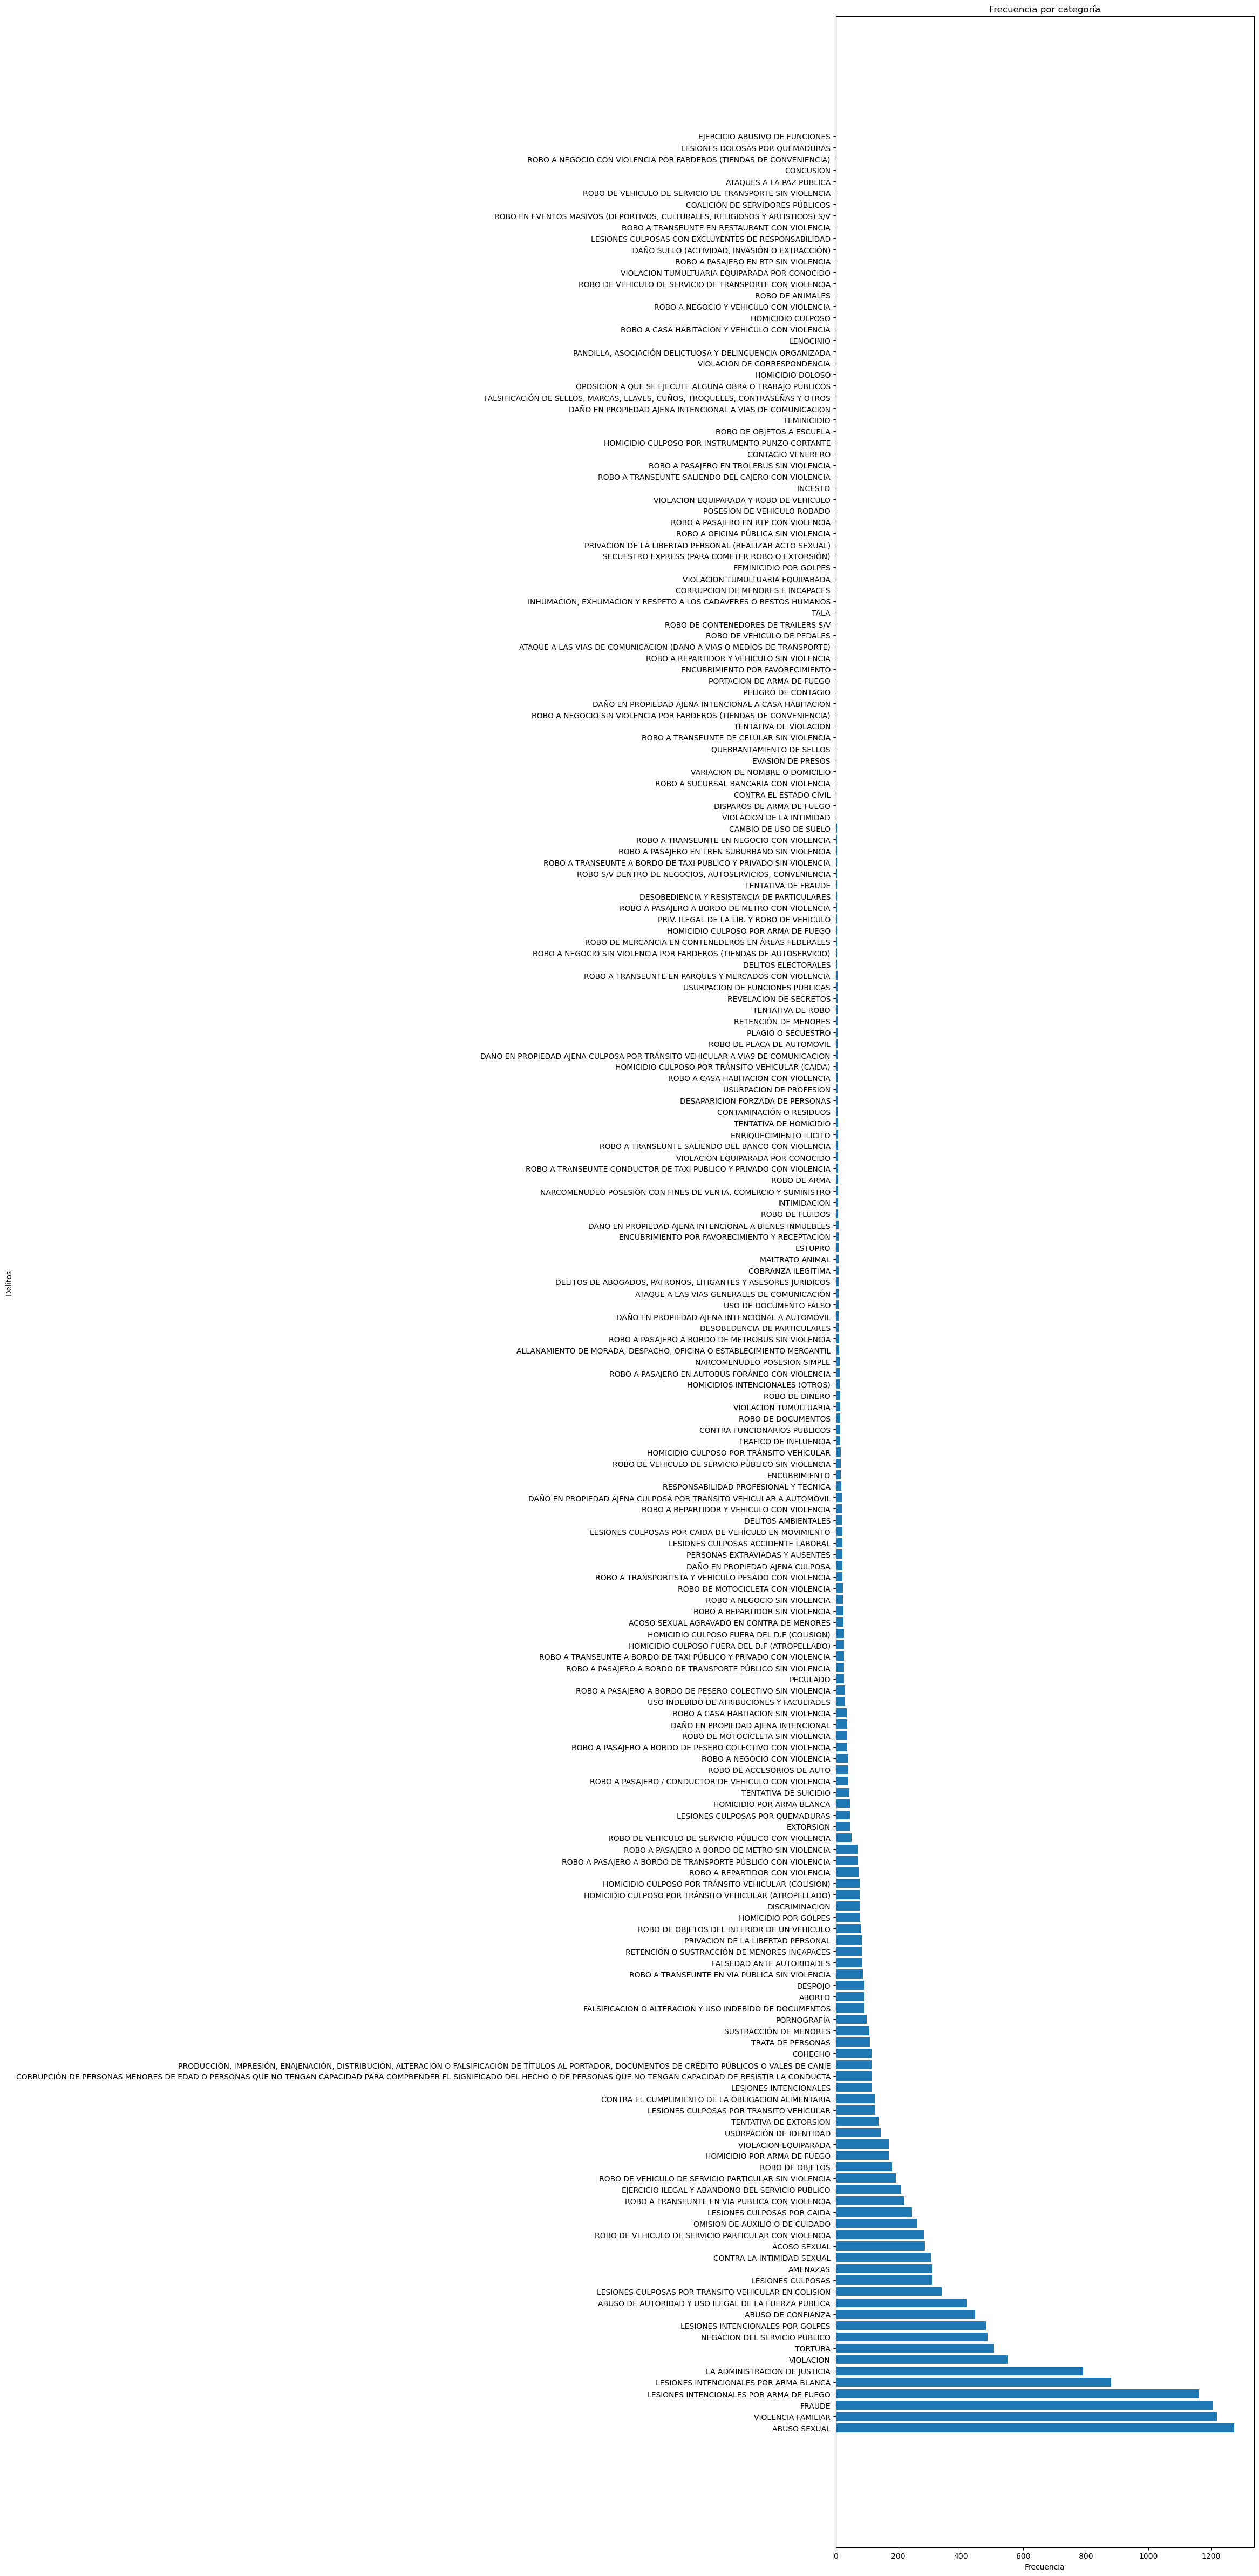

In [93]:
#Obtener la frecuencia de los crímenes sin ubicación
delito_sin_ubicacion = carpetas_sin_ubicacion['delito'].value_counts()

# Convertir a DataFrame
delitos_sin_ubi_df = delito_sin_ubicacion.reset_index()
delitos_sin_ubi_df.columns = ['delito', 'frecuencia']

#Gráfica de barras horizontal
plt.figure(figsize=(10, len(delitos_sin_ubi_df) * 0.3))  # alto dinámico según número de delitos
plt.barh(delitos_sin_ubi_df['delito'], delitos_sin_ubi_df['frecuencia'])
plt.title("Frecuencia por categoría")
plt.xlabel("Frecuencia")
plt.ylabel("Delitos")
plt.tight_layout()
plt.show()

## Identificar los tipos de delitos 

Aquí lo que quiero hacer es identificar los delitos individuales que hay en mi base de datos. Identifico el tipo y las veces que se repite/ocurre.

In [94]:
delito_tipos = df_concatenado_limp_2['delito'].value_counts()
delito_tipos

delito
VIOLENCIA FAMILIAR                                         53461
FRAUDE                                                     28938
AMENAZAS                                                   28078
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA             21857
ROBO DE OBJETOS                                            21670
                                                           ...  
UTILIZACION INDEBIDA DE LA VIA PUBLICA                         1
HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE               1
LENOCINIO                                                      1
ROBO DURANTE TRASLADO DE VALORES (NOMINA) SIN VIOLENCIA        1
DESACATO                                                       1
Name: count, Length: 270, dtype: int64

## Identificar los 95% de delitos más frecuentes

En este punto, con la tabla anterior, busco identificar el $95\%$ de delitos más frecuentes durante el periodo de 2019 a 2024. 

Esto es el objetivo de que cuando haga la clasificación de los delitos individuales en grupos (que haré en excel), esta sea más fácil.

De esta manera, de $287$ delitos individuales que hay en todo el periodo, solo clasificaré/ocuparé $82$. 

In [95]:
# Convertir a DataFrame
delitos_df = delito_tipos.reset_index()
delitos_df.columns = ['delito', 'frecuencia']

# Calcular el total de crímenes
total = delitos_df['frecuencia'].sum()

# Calcular el porcentaje de cada delito
delitos_df['porcentaje'] = delitos_df['frecuencia'] / total

# Calcular el porcentaje acumulado
delitos_df['porcentaje_acumulado'] = delitos_df['porcentaje'].cumsum()

# Filtrar solo los delitos que suman hasta el 95%
delitos_top_95 = delitos_df[delitos_df['porcentaje_acumulado'] <= 0.95]

# Guardar el resultado
delitos_top_95.to_csv(os.path.join(carpeta, "delitos_top_95_v3.csv"), index=False, encoding='utf-8-sig')

### Modificación para poder hacer el diff-diff (no correr cuándo se están agrupando los delitos por primera vez

In [96]:
#Cargar el CSV
#archivo = "delitos_top_95_agrupados_v4.csv"
#ruta_completa = os.path.join(carpeta, archivo)
#delitos_agrupados = pd.read_csv(ruta_completa)
#delitos_agrupados

#Une el csv con el dataframe principal mediante la columna 'delito'. Se le pega la columna 'delitos_grupo' a la derecha del df principal
#df_concat_prov = delitos_top_95.merge(
 #   delitos_agrupados, 
  #  on='delito', 
   # how='left'
#)

#Guardar el resultado
#df_concat_prov.to_csv(os.path.join(carpeta, "delitos_top_95_v3.csv"), index=False, encoding='utf-8-sig')

In [97]:
#df_concat_prov

## Agrupar los tipos de delitos en categorías 

En este punto lo que hago es pegar la agrupación de delitos que hice (en excel) como una nueva columna a la base principal. 

A su vez, los delitos que no fueron clasificados significan que no pertenecen al grupo de $95\%$ de delitos más frecuentes. Por lo tanto, desecho de mi base esas observaciones.  

### Cargar la base con los delitos agrupados

In [98]:
#Cargar el CSV
archivo = "delitos_top_95_agrupados_v4.csv"
ruta_completa = os.path.join(carpeta, archivo)
delitos_agrupados = pd.read_csv(ruta_completa)
delitos_agrupados

,delito,delitos_grupos,duda,eliminar
0,VIOLENCIA FAMILIAR,familia,0.0,0.0
1,FRAUDE,patrimonio,0.0,1.0
2,AMENAZAS,otros,0.0,0.0
3,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,patrimonio,0.0,0.0
4,ROBO DE OBJETOS,patrimonio,0.0,0.0
...,...,...,...,...
76,PERSONAS EXTRAVIADAS Y AUSENTES,vida_integridad_corporal,0.0,1.0
77,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,patrimonio,0.0,0.0
78,LESIONES CULPOSAS,vida_integridad_corporal,0.0,0.0
79,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,patrimonio,0.0,0.0


### Hacer una pequeña limpieza de la base y pegarsela al dataframe principal

In [99]:
#Eliminar observaciones donde la columna 'eliminar' toma el valor de "1"
delitos_agrupados_limpio = delitos_agrupados[delitos_agrupados['eliminar'] != 1]

#Une el csv con el dataframe principal mediante la columna 'delito'. Se le pega la columna 'delitos_grupo' a la derecha del df principal
df_concatenado_limp_3 = df_concatenado_limp_2.merge(
    delitos_agrupados_limpio[['delito', 'delitos_grupos']], 
    on='delito', 
    how='left'
)
df_concatenado_limp_3

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,agencia,unidad_investigacion,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud,delitos_grupos
0,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,01:05:00,DAÑO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,...,IZC-2,UI-3SD,AGRÍCOLA PANTITLAN,Agricola Pantitlan,IZTACALCO,Iztacalco,CDMX,19.404300,-99.068570,NaN
1,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,02:15:00,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,DELITO DE BAJO IMPACTO,...,AO-3,UI-3CD,GARCIMARRERO,Garcimarrero,ALVARO OBREGON,Álvaro Obregón,CDMX,19.367490,-99.237140,NaN
2,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,00:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,MC-1,UI-3SD,EL ERMITAÑO,Tierra Unida,LA MAGDALENA CONTRERAS,La Magdalena Contreras,CDMX,19.304150,-99.267220,patrimonio
3,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,01:15:00,DAÑO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,...,TLP-2,UI-3CD,SAN MIGUEL XICALCO,Pueblo San Miguel Xicalco,TLALPAN,Tlalpan,CDMX,19.231990,-99.166340,NaN
4,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,04:00:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,...,IZP-6,UI-3CD,XALPA,Xalpa,IZTAPALAPA,Iztapalapa,CDMX,19.339530,-99.015450,patrimonio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427253,2024,Julio,2024-07-30,12:36:00,2020.0,Diciembre,2020-12-01,10:00:00,FALSIFICACION O ALTERACION Y USO INDEBIDO DE D...,DELITO DE BAJO IMPACTO,...,UAT-AO-4,UI-1SD,DOCTORES,Doctores,CUAUHTEMOC,Cuauhtémoc,CDMX,19.420953,-99.147997,otros
427254,2024,Julio,2024-07-30,14:24:00,2019.0,Octubre,2019-10-01,12:00:00,ABUSO SEXUAL,DELITO DE BAJO IMPACTO,...,D,UI-2SD,SANTA MARTHA ACATITLA,Pueblo Santa Martha Acatitla,IZTAPALAPA,Iztapalapa,CDMX,19.361666,-99.007317,libertad_seguridad_sexual
427255,2024,Julio,2024-07-30,17:16:00,2020.0,Junio,2020-06-01,10:00:00,FRAUDE,DELITO DE BAJO IMPACTO,...,T,UI-1SD,LOMAS DE CHAPULTEPEC I SECCIÓN,Lomas De Chapultepec Iii Seccion,MIGUEL HIDALGO,Miguel Hidalgo,CDMX,19.431047,-99.207541,NaN
427256,2024,Julio,2024-07-31,08:25:00,2019.0,Diciembre,2019-12-01,12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,...,T,UI-1SD,GENERAL PEDRO MARIA ANAYA,General Pedro Ma Anaya,BENITO JUAREZ,Benito Juárez,CDMX,19.362464,-99.160209,NaN


#### Identifico cuántas observaciones/carpetas no tienen agrupación asignada. En teoría, esto significa que no pertenecen al $95\%$ de delitos más frecuentes. También hago una gráfica para ver la frecuencia y observar que no haya ningún delito que sí debería haber entrado a los $95\%$ más frecuentes 

Número de observaciones/carpetas eliminadas por no tener grupo: 92148


C:\Users\santo\AppData\Local\Temp\ipykernel_96712\3796675398.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


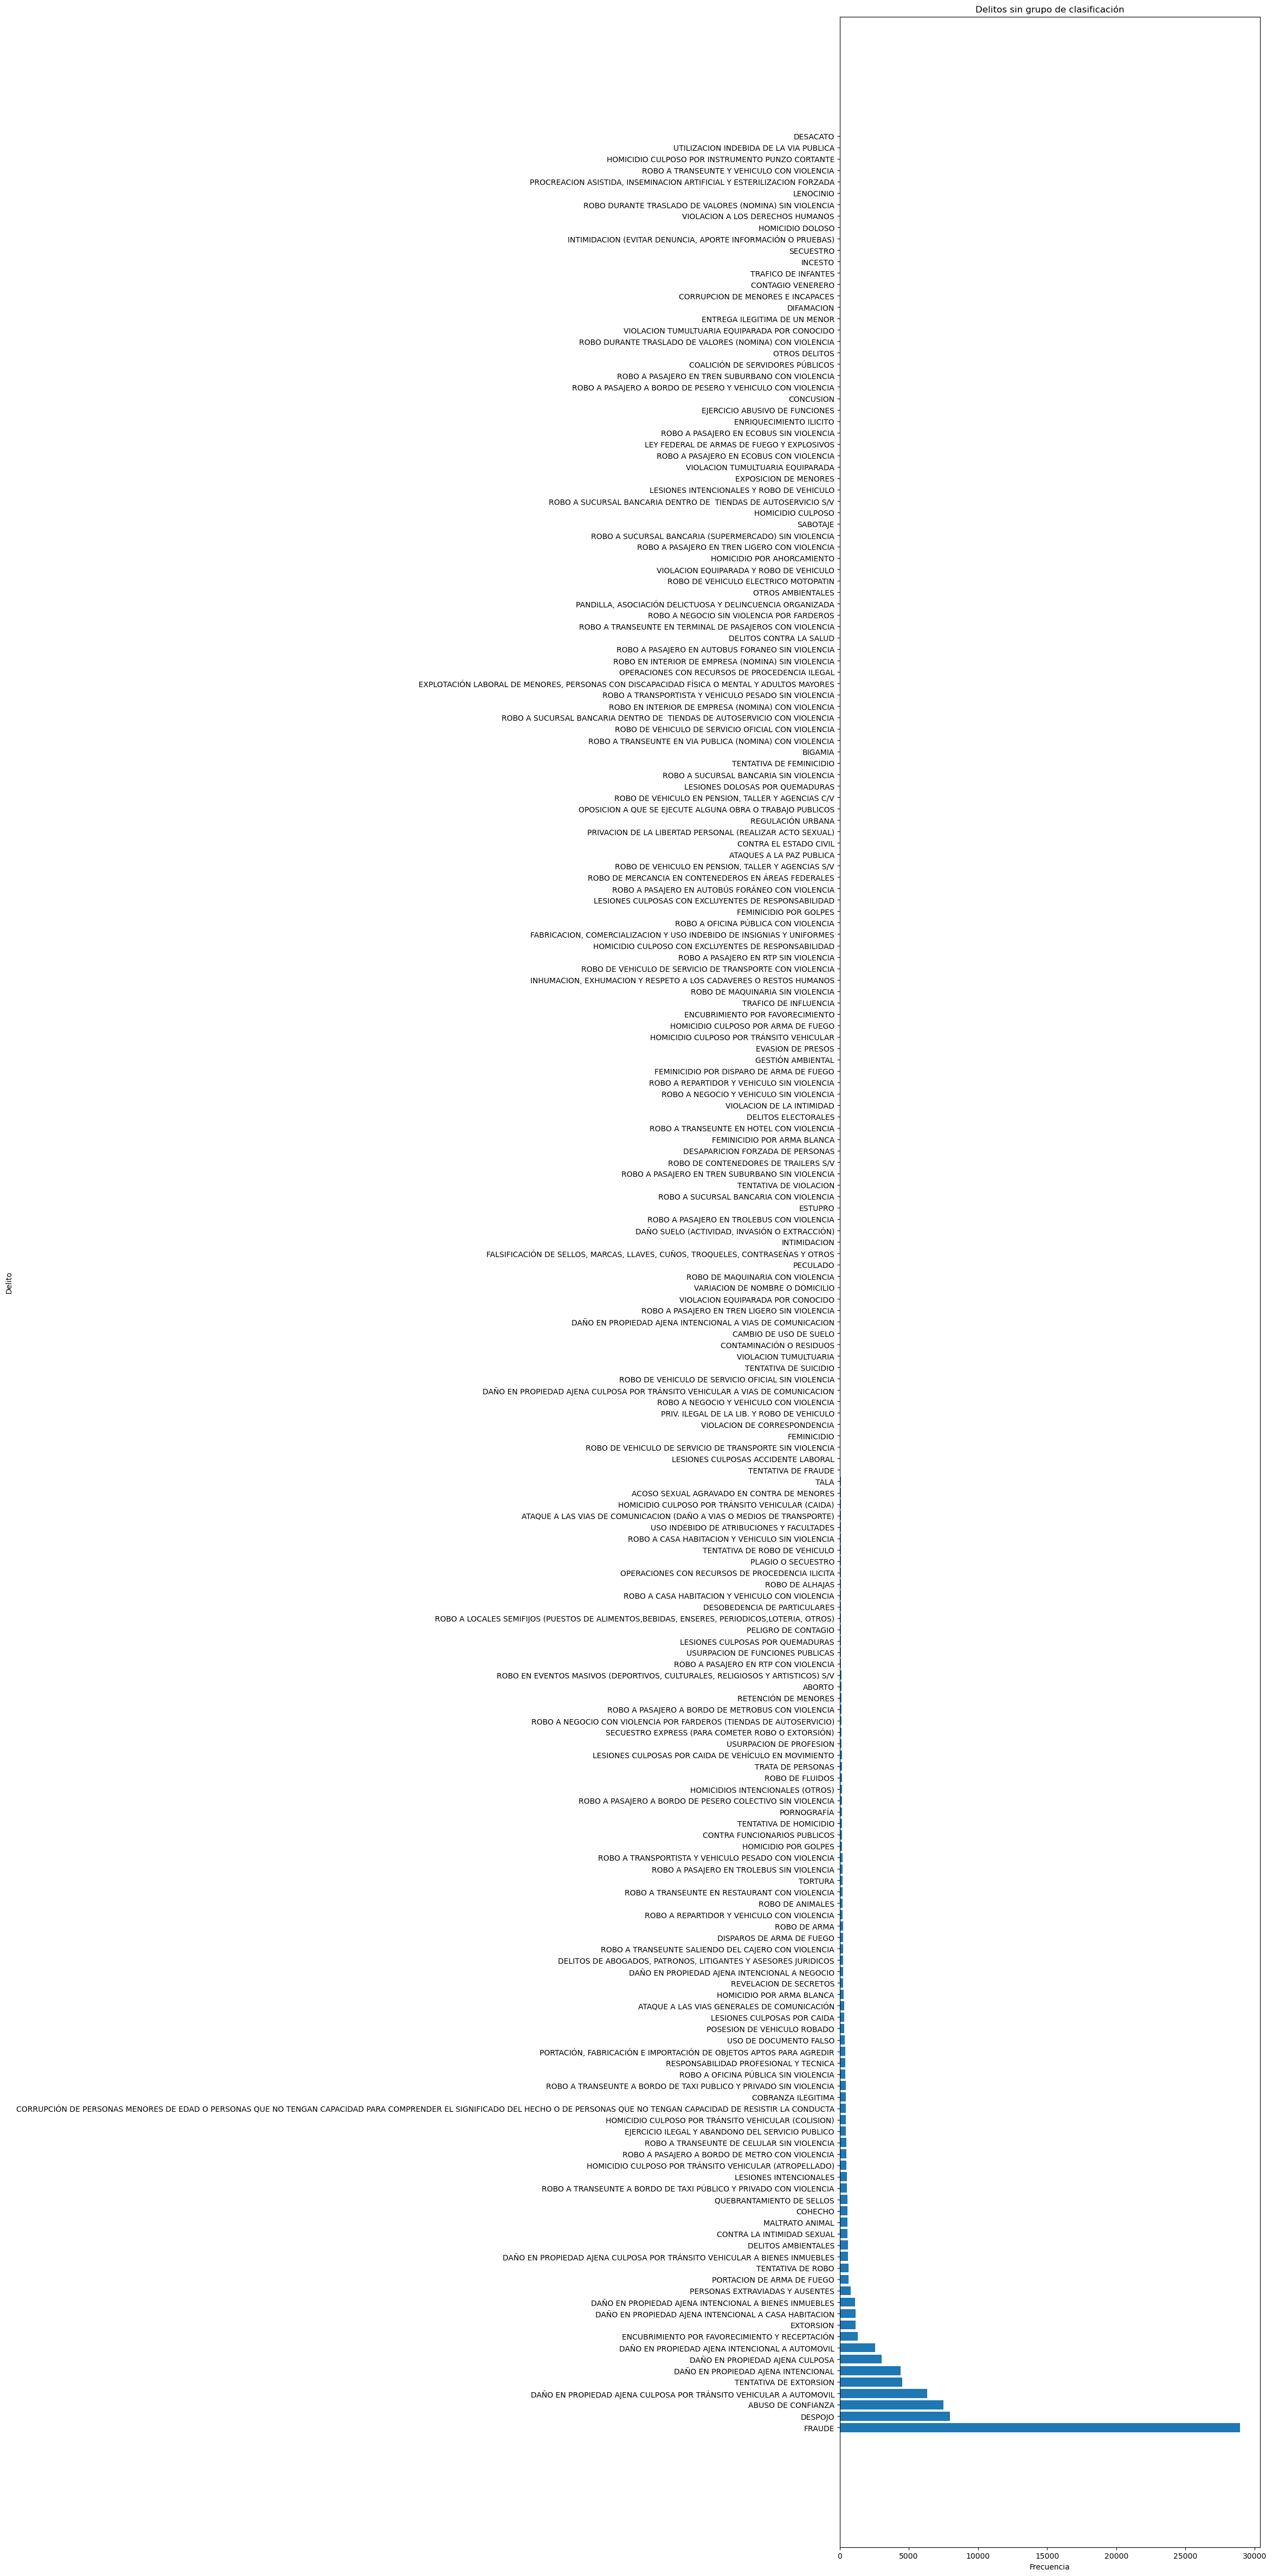

In [100]:
# 1. Filtrar delitos sin grupo y contar cuántos hay
delitos_sin_grupo = df_concatenado_limp_3[df_concatenado_limp_3['delitos_grupos'].isna()]
print(f"Número de observaciones/carpetas eliminadas por no tener grupo: {len(delitos_sin_grupo)}")

# 2. Obtener la frecuencia de esos delitos
delitos_sin_grupo_df = (
    delitos_sin_grupo['delito']
    .value_counts()
    .reset_index()
)

delitos_sin_grupo_df.columns = ['delito', 'frecuencia']


# 3. Gráfica de barras horizontal
plt.figure(figsize=(10, len(delitos_sin_grupo_df) * 0.3))
plt.barh(delitos_sin_grupo_df['delito'], delitos_sin_grupo_df['frecuencia'])
plt.title("Delitos sin grupo de clasificación")
plt.xlabel("Frecuencia")
plt.ylabel("Delito")
plt.tight_layout()
plt.show()

In [101]:
delitos_sin_grupo_df

,delito,frecuencia
0,FRAUDE,28938
1,DESPOJO,7956
2,ABUSO DE CONFIANZA,7485
3,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,6308
4,TENTATIVA DE EXTORSION,4524
...,...,...
197,"PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL ...",1
198,ROBO A TRANSEUNTE Y VEHICULO CON VIOLENCIA,1
199,HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE,1
200,UTILIZACION INDEBIDA DE LA VIA PUBLICA,1


## Limpieza de columnas/variables, observaciones y adición de fecha

Por último, desecho las columnas que no ocuparé para mi análisis y de una vez les agrego una columna al dataframe para que indique el mes y año en el que ocurrieron los delitos. 

In [102]:
#Eliminar observaciones sin grupo
df_concatenado_limp_4 = df_concatenado_limp_3.dropna(subset=['delitos_grupos']).copy()



#Eliminar columnas que no se ocuparan
columnas_a_eliminar = ['anio_inicio', 'mes_inicio', 'fecha_inicio', 'hora_inicio', 'anio_hecho', 'mes_hecho', 'hora_hecho', 'delito', 'categoria_delito', 'competencia', 'fiscalia', 'agencia', 'unidad_investigacion', 'colonia_hecho', 'colonia_catalogo', 'alcaldia_hecho', 'alcaldia_catalogo', 'municipio_hecho']
df_concatenado_final = df_concatenado_limp_4.drop(columns = columnas_a_eliminar)

In [103]:
df_concatenado_limp_4

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,agencia,unidad_investigacion,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud,delitos_grupos
2,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,00:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,MC-1,UI-3SD,EL ERMITAÑO,Tierra Unida,LA MAGDALENA CONTRERAS,La Magdalena Contreras,CDMX,19.304150,-99.267220,patrimonio
4,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,04:00:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,...,IZP-6,UI-3CD,XALPA,Xalpa,IZTAPALAPA,Iztapalapa,CDMX,19.339530,-99.015450,patrimonio
6,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,03:09:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,...,CUH-3,UI-3SD,MORELOS,Morelos,CUAUHTEMOC,Cuauhtémoc,CDMX,19.445560,-99.130780,vida_integridad_corporal
7,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,04:00:00,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,...,IZP-9,UI-3SD,SANTA MARTHA ACATITLA NORTE,Santa Martha Acatitla Norte,IZTAPALAPA,Iztapalapa,CDMX,19.379010,-99.023610,patrimonio
8,2019,Enero,2019-01-01,00:00:00,2019.0,Enero,2019-01-01,05:30:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,...,CUH-8,UI-3SD,OBRERA,Obrera,CUAUHTEMOC,Cuauhtémoc,CDMX,19.422270,-99.134220,patrimonio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427236,2024,Julio,2024-07-24,14:48:00,2020.0,Enero,2020-01-01,23:00:00,VIOLACION,VIOLACIÓN,...,FDS-7,FDS-7-01,2A. AMPLIACIÓN SANTIAGO ACAHUALTEPEC,Santiago Acahualtepec 2a Ampliacion,IZTAPALAPA,Iztapalapa,CDMX,19.350359,-99.012346,libertad_seguridad_sexual
427240,2024,Julio,2024-07-25,16:50:00,2019.0,Junio,2019-06-01,12:00:00,LA ADMINISTRACION DE JUSTICIA,DELITO DE BAJO IMPACTO,...,B,UI-2CD,EL TRIUNFO,El Triunfo,IZTAPALAPA,Iztapalapa,CDMX,19.379718,-99.122444,otros
427246,2024,Julio,2024-07-27,15:31:00,2020.0,Agosto,2020-08-01,16:00:00,ROBO DE DOCUMENTOS,DELITO DE BAJO IMPACTO,...,UAT-IZC-2,UI-1SD,INFONAVIT IZTACALCO,Infonavit Iztacalco,IZTACALCO,Iztacalco,CDMX,19.386376,-99.109842,patrimonio
427253,2024,Julio,2024-07-30,12:36:00,2020.0,Diciembre,2020-12-01,10:00:00,FALSIFICACION O ALTERACION Y USO INDEBIDO DE D...,DELITO DE BAJO IMPACTO,...,UAT-AO-4,UI-1SD,DOCTORES,Doctores,CUAUHTEMOC,Cuauhtémoc,CDMX,19.420953,-99.147997,otros


In [104]:
df_concatenado_final

,fecha_hecho,latitud,longitud,delitos_grupos
2,2019-01-01,19.304150,-99.267220,patrimonio
4,2019-01-01,19.339530,-99.015450,patrimonio
6,2019-01-01,19.445560,-99.130780,vida_integridad_corporal
7,2019-01-01,19.379010,-99.023610,patrimonio
8,2019-01-01,19.422270,-99.134220,patrimonio
...,...,...,...,...
427236,2020-01-01,19.350359,-99.012346,libertad_seguridad_sexual
427240,2019-06-01,19.379718,-99.122444,otros
427246,2020-08-01,19.386376,-99.109842,patrimonio
427253,2020-12-01,19.420953,-99.147997,otros


## Exportar la base de datos final

In [105]:
carpeta_final = r"C:\Users\santo\Documents\CIDE\Tesis\datos_unidos"
df_concatenado_final.to_csv(os.path.join(carpeta_final, "crimen_limpio.csv"), index=False, encoding='utf-8-sig')